# **Data Processing**


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
dataset=pd.read_csv('insurance.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1)

# **Training Model**

In [61]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_tree = RandomForestRegressor(n_estimators=1000,random_state=0)
regressor_random_tree.fit(X,y)

RandomForestRegressor(n_estimators=1000, random_state=0)

# **Predicting Result**

In [62]:
y_pred_random = regressor_random_tree.predict(X_test)
print(np.concatenate((y_pred_random.reshape(len(y_pred_random),1), y_test.reshape(len(y_test),1)),1))

[[ 1685.61571906  1646.4297    ]
 [11699.56098871 11353.2276    ]
 [ 9203.02626673  8798.593     ]
 [10872.2089981  10381.4787    ]
 [ 2139.8266071   2103.08      ]
 [39461.5890495  38746.3551    ]
 [ 9430.66176701  9304.7019    ]
 [11634.9968453  11658.11505   ]
 [ 3108.19037087  3070.8087    ]
 [19616.72390986 19539.243     ]
 [14291.12187387 12629.8967    ]
 [11868.4334617  11538.421     ]
 [ 8567.16276669  6338.0756    ]
 [ 7045.40942189  7050.642     ]
 [ 1309.7683071   1137.4697    ]
 [ 9476.74877472  8968.33      ]
 [15834.08004782 21984.47061   ]
 [ 6734.53670376  6414.178     ]
 [24468.93394286 28287.89766   ]
 [13497.86141625 13462.52      ]
 [11006.96650468  9722.7695    ]
 [41862.04090504 40932.4295    ]
 [ 9887.02670429  8026.6666    ]
 [ 9237.09469707  8444.474     ]
 [10695.1038868   2203.47185   ]
 [ 6614.29886805  6664.68595   ]
 [10306.6388157   8606.2174    ]
 [ 8723.38164385  8283.6807    ]
 [ 5992.67861636  5375.038     ]
 [ 3706.44106357  3645.0894    ]
 [12195.98

# **Visualising Data**

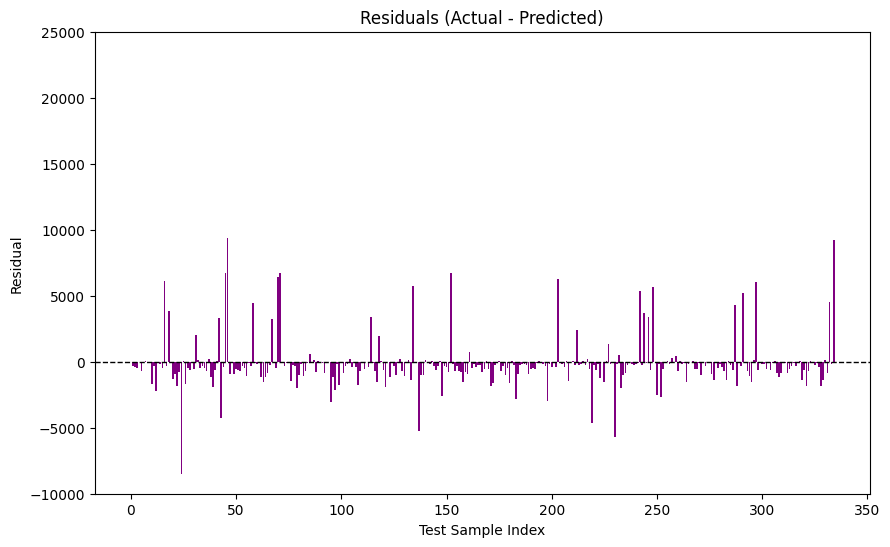

In [63]:
residuals = y_test - y_pred_random
index = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.bar(index, residuals, color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual')
plt.ylim(-10000, 25000)
plt.show()

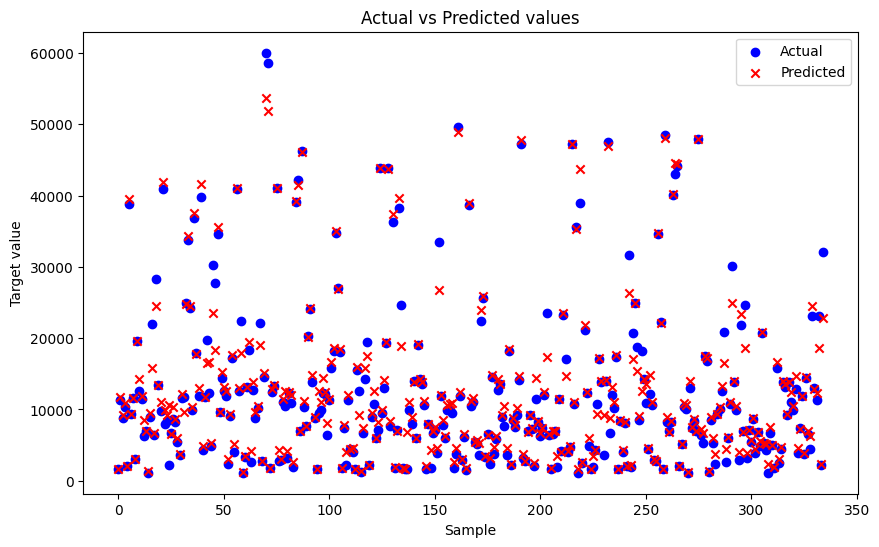

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_random)), y_pred_random, color='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted values')
plt.xlabel('Sample')
plt.ylabel('Target value')
plt.legend()
plt.show()